<a href="https://colab.research.google.com/github/MatthewYancey/GANime/blob/master/src/process_frame_masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import os
import shutil
import glob
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
IMAGE_ZIP = '/content/gdrive/MyDrive/repos/GANime/data_out/pokemon/test.zip'
TEMP_DIR = '/content/frames/'
HEIGHT = 288
WIDTH = 512
SINGLE_SIDE = 64

In [7]:
# unzips images
if os.path.exists(TEMP_DIR) == False:
    shutil.unpack_archive(IMAGE_ZIP, TEMP_DIR, 'zip')

In [12]:
img_list = glob.glob(TEMP_DIR + '*')
img_list = img_list[:IMAGE_SAMPLE]
print(f'Number of images: {len(img_list)}')

Number of images: 1000


In [21]:
# go through the images and make the masks
img = cv2.imread('16693_1_mask.png')
img.shape

(719, 1024, 3)

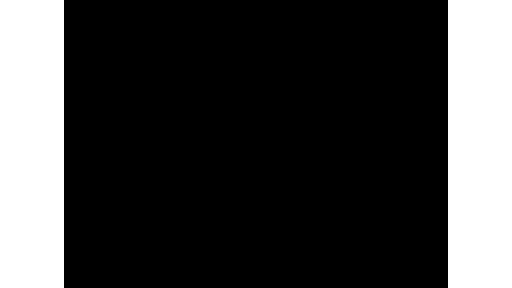

True

In [41]:
inside = np.zeros((HEIGHT, WIDTH - 2*SINGLE_SIDE, 3), np.uint8)
outsides = np.ones((HEIGHT, SINGLE_SIDE, 3), np.uint8) * 255
blank_image = cv2.hconcat([outsides, inside, outsides])
cv2_imshow(blank_image)
cv2.imwrite('test.png', blank_image)